Baseline Comparison Figures - Working File

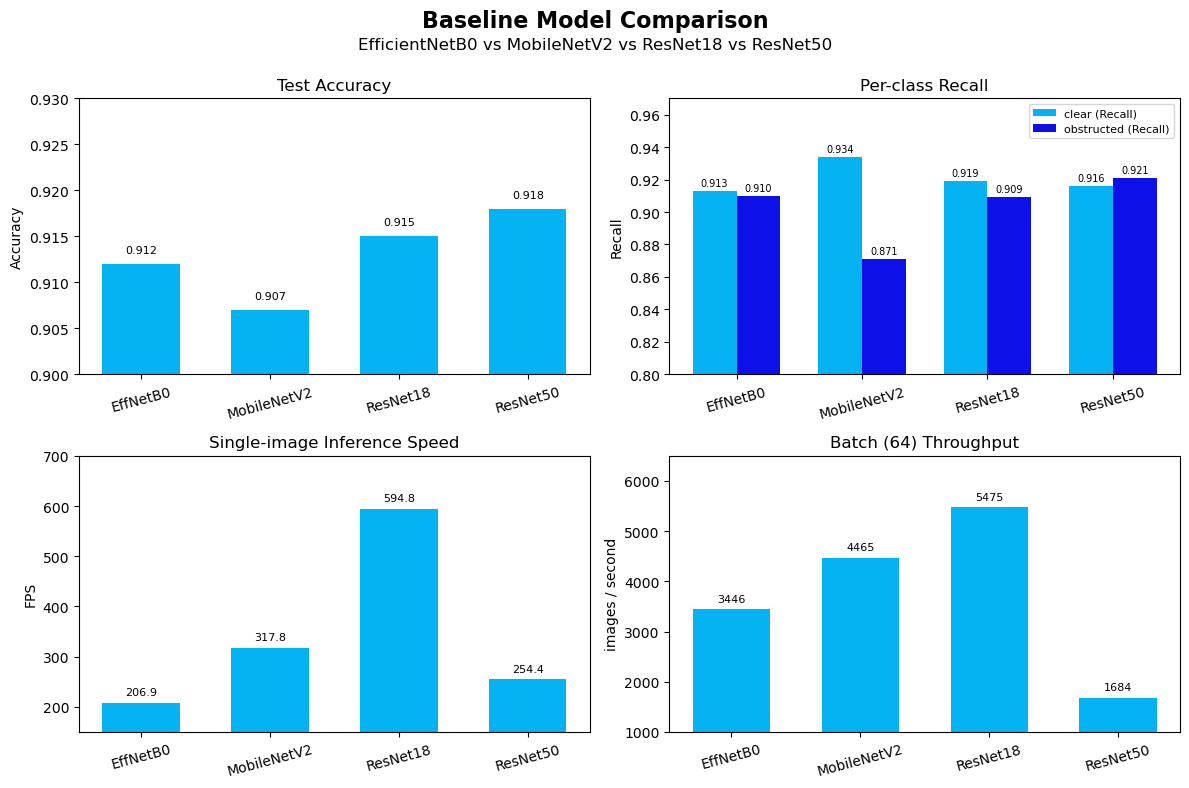

In [ ]:
# === Baseline Comparison Figures ===

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Hard-code baseline metrics
# -----------------------------
models = ["EffNetB0", "MobileNetV2", "ResNet18", "ResNet50"]

acc = np.array([0.912, 0.907, 0.915, 0.918])

f1_clear = np.array([0.923, 0.921, 0.925, 0.928])
f1_obstructed = np.array([0.898, 0.888, 0.900, 0.905])

single_fps = np.array([206.9, 317.8, 594.8, 254.4])
throughput = np.array([3446.0, 4465.3, 5474.8, 1684.3])

# Colors
grey = "#06B3F2"       # dark grey
black = "#0E11E7"      # pure black

# -----------------------------
# 2. Create comparison figure
# -----------------------------
plt.style.use("default")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Baseline Model Comparison", fontsize=16, weight="bold")
fig.text(0.5, 0.93, "EfficientNetB0 vs MobileNetV2 vs ResNet18 vs ResNet50", ha="center", fontsize=12, weight="normal")

x = np.arange(len(models))
bar_width = 0.35

# ---- (a) Overall accuracy ----
ax = axes[0, 0]
ax.bar(x, acc, width=0.6, color=grey)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0.90, 0.93)
ax.set_ylabel("Accuracy")
ax.set_title("Test Accuracy")
for i, v in enumerate(acc):
    ax.text(i, v + 0.001, f"{v:.3f}", ha="center", va="bottom", fontsize=8)

# ---- (b) Per-class Recall ----
recall_clear = np.array([0.913, 0.934, 0.919, 0.916])
recall_obstructed = np.array([0.910, 0.871, 0.909, 0.921])

ax = axes[0, 1]
ax.bar(x - bar_width/2, recall_clear, width=bar_width, color=grey, label="clear (Recall)")
ax.bar(x + bar_width/2, recall_obstructed, width=bar_width, color=black, label="obstructed (Recall)")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0.80, 0.97)
ax.set_ylabel("Recall")
ax.set_title("Per-class Recall")
ax.legend(fontsize=8)

for i, (rc, ro) in enumerate(zip(recall_clear, recall_obstructed)):
    ax.text(i - bar_width/2, rc + 0.002, f"{rc:.3f}", ha="center", va="bottom", fontsize=7)
    ax.text(i + bar_width/2, ro + 0.002, f"{ro:.3f}", ha="center", va="bottom", fontsize=7)


# ---- (c) Single-image FPS ----
ax = axes[1, 0]
ax.bar(x, single_fps, width=0.6, color=grey)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(150, 700)
ax.set_ylabel("FPS")
ax.set_title("Single-image Inference Speed")

for i, v in enumerate(single_fps):
    ax.text(i, v + max(single_fps)*0.02, f"{v:.1f}", ha="center", va="bottom", fontsize=8)

# ---- (d) Batch throughput ----
ax = axes[1, 1]
ax.bar(x, throughput, width=0.6, color=grey)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(1000, 6500)
ax.set_ylabel("images / second")
ax.set_title("Batch (64) Throughput")

for i, v in enumerate(throughput):
    ax.text(i, v + max(throughput)*0.02, f"{v:.0f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
